In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
def get_fitness(dir):
    criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

    fitness_header = ["DOL","DVE","DPD","DSM","DFD"]

    criterion = pd.read_csv(dir+'criterion.csv',names=criterion_header)
    fitness = pd.read_csv(dir+'fitness.csv',names=fitness_header)
    result = pd.DataFrame()
    
    result['RouteCompletionTest']   =   criterion["RouteCompletionTest_figure"]/100
    result['OutsideRouteLanesTest'] = 1-criterion["OutsideRouteLanesTest_figure"]/100
    result['CollisionTest']         =   criterion["CollisionTest"]
    result['RunningRedLightTest']   = 1-criterion["RunningRedLightTest"]
    result['RunningStopTest']       = 1-criterion["RunningStopTest"]
    result['InRouteTest']           = 1-criterion["InRouteTest"]
    result['AgentBlockedTest']      = 1-criterion["AgentBlockedTest"]
    result['Timeout']               = 1-criterion["Timeout"]
    
    DVE = fitness['DVE'].copy()/2
    DVE[fitness['DVE'] >= 2] = 1

    collisionTest = result['CollisionTest'].copy()
    collisionTest[result['CollisionTest']==0] = DVE[result['CollisionTest']==0]
    collisionTest[result['CollisionTest']==1] = 0

    result.loc[:,'CollisionTest'] = collisionTest
    
    return result

In [86]:
random_data = '../../data/routes_short_2023-07-13|17:37:13/'
NSGA_data_0 = '../../data/routes_short_2023-07-15|14:50:31/'
NSGA_data_1 = '../../data/routes_short_2023-07-15|23:06:26/'
NSGA_data_2 = '../../data/routes_short_2023-07-16|07:13:14/'
data_label = ['Random','NSGA_0','NSGA_1','NSGA_2'] 

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"]

random_fitness = get_fitness(random_data)[select_criterions]
NSGA_0_fitness = get_fitness(NSGA_data_0)[select_criterions]
NSGA_1_fitness = get_fitness(NSGA_data_1)[select_criterions]
NSGA_2_fitness = get_fitness(NSGA_data_2)[select_criterions]
print(random_fitness.shape)
print(NSGA_0_fitness.shape)
print(NSGA_1_fitness.shape)
print(NSGA_2_fitness.shape)

(975, 4)
(390, 4)
(390, 4)
(390, 4)


In [87]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

random_scenarios = pd.read_csv(random_data+'scenario.csv',names=scenario_header)
NSGA_0_scenarios = pd.read_csv(NSGA_data_0+'scenario.csv',names=scenario_header)
NSGA_1_scenarios = pd.read_csv(NSGA_data_1+'scenario.csv',names=scenario_header)
NSGA_2_scenarios = pd.read_csv(NSGA_data_2+'scenario.csv',names=scenario_header)

print(random_scenarios.shape)
print(NSGA_0_scenarios.shape)
print(NSGA_1_scenarios.shape)
print(NSGA_2_scenarios.shape)

(975, 14)
(390, 14)
(390, 14)
(390, 14)


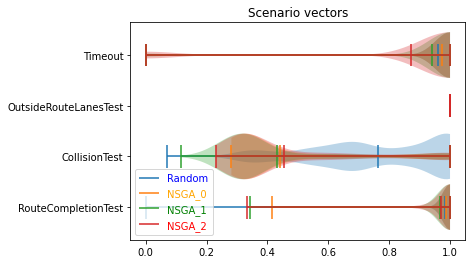

In [89]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(random_fitness, vert=False, showmeans=True, widths=0.9)
vl2 = plt.violinplot(NSGA_0_fitness, vert=False, showmeans=True, widths=0.9)
vl3 = plt.violinplot(NSGA_1_fitness, vert=False, showmeans=True, widths=0.9)
vl4 = plt.violinplot(NSGA_2_fitness, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 5), select_criterions)
plt.title("Scenario vectors")
plt.legend(handles=(vl1['cbars'],vl2['cbars'],vl3['cbars'],vl4['cbars']), 
           labels=[data_label[0],data_label[1],data_label[2],data_label[3]],
           labelcolor=['blue','orange','green','red'],
           loc=3)

plt.show()

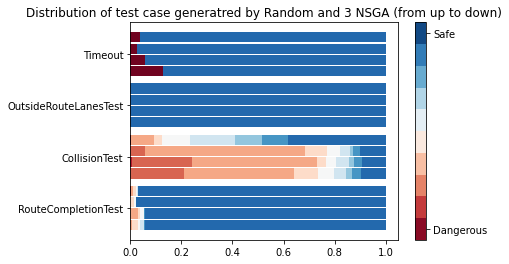

In [90]:
import matplotlib as mpl
cmap = mpl.cm.RdBu
colors = cmap(range(3,253,25))

stack_hist_discrete = np.concatenate([
    [np.histogram(random_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(random_fitness)],
    [np.histogram(random_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(random_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)+0.33, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]


stack_hist_discrete = np.concatenate([
    [np.histogram(NSGA_0_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
    [np.histogram(NSGA_0_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(NSGA_0_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)+0.11, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]

stack_hist_discrete = np.concatenate([
    [np.histogram(NSGA_1_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
    [np.histogram(NSGA_1_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(NSGA_1_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)-0.11, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]

stack_hist_discrete = np.concatenate([
    [np.histogram(NSGA_2_fitness['RouteCompletionTest'],   range=(0,1), bins=10)[0]/len(NSGA_2_fitness)],
    [np.histogram(NSGA_2_fitness['CollisionTest'],         range=(0,1), bins=10)[0]/len(NSGA_2_fitness)],
    [np.histogram(NSGA_2_fitness['OutsideRouteLanesTest'], range=(0,1), bins=10)[0]/len(NSGA_2_fitness)],
    [np.histogram(NSGA_2_fitness['Timeout'],               range=(0,1), bins=10)[0]/len(NSGA_2_fitness)],
])
left = np.zeros(4)
for i in range(10):
    plt.barh(y = np.arange(4)-0.33, width = stack_hist_discrete[:,i], left=left, color = colors[i], height=0.2)
    left += stack_hist_discrete[:,i]



plt.yticks(range(4), select_criterions)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ticklocation='right',values=range(10), ticks=[0, 9])
cbar.ax.set_yticklabels(['Dangerous', 'Safe'])  # vertically oriented colorbar

plt.title('Distribution of test case generatred by Random and 3 NSGA (from up to down)')
plt.show()

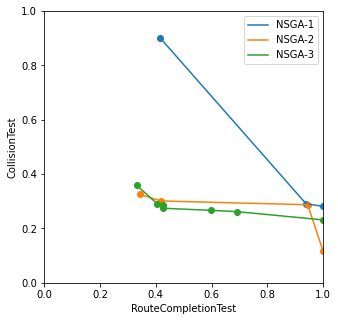

In [91]:
plt.figure(figsize=(5,5))

result_dirs = [
    '../../surrogate/routes_short_2023-07-15|14:50:31/',
    '../../surrogate/routes_short_2023-07-15|23:06:26/',
    '../../surrogate/routes_short_2023-07-16|07:13:14/'
]
data_labels = ['NSGA-1', 'NSGA-2', 'NSGA-3']

for i, result_dir in enumerate(result_dirs):
    NSGA_result = np.load(result_dir+'output.npz')
    # scenario = NSGA_result['arr_0']
    criterion = NSGA_result['arr_1']
    criterion = criterion[np.argsort(criterion,axis=0)[:,0]]
    plt.scatter(x=criterion[:,0], y=criterion[:,2])
    plt.plot(criterion[:,0], criterion[:,2], label=data_labels[i])

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('RouteCompletionTest')
plt.ylabel('CollisionTest')
plt.legend()
plt.show()

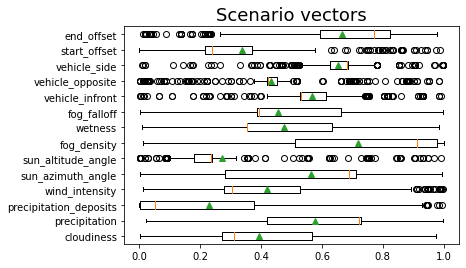

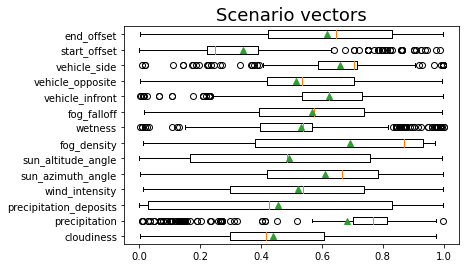

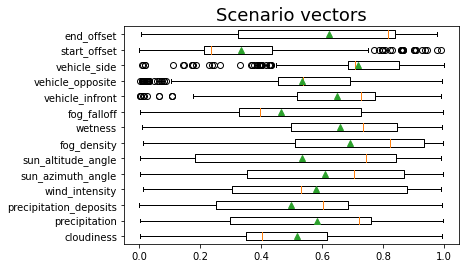

In [12]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

for data in [NSGA_data_0,NSGA_data_1,NSGA_data_2]:
    scenarios = pd.read_csv(data+'scenario.csv',names=scenario_header)
    # plt.figure(figsize=(20,2))
    plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
    plt.title("Scenario vectors", fontsize=18)
    plt.show()

(-0.052, 0.098)


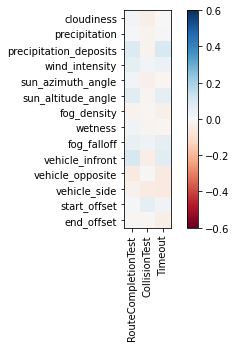

(-0.306, 0.268)


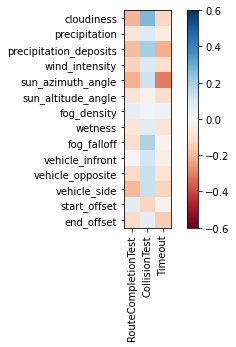

(-0.482, 0.442)


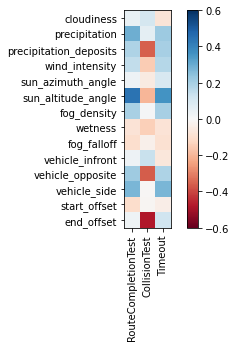

(-0.683, 0.427)


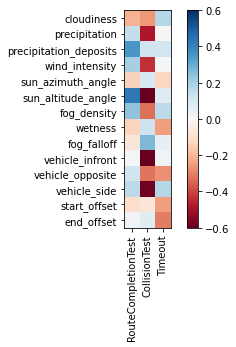

In [13]:
select_criterions = ["RouteCompletionTest", "CollisionTest", "Timeout"] 


for data,fitness in [(random_data,random_fitness),
                     (NSGA_data_0,NSGA_0_fitness),
                     (NSGA_data_1,NSGA_1_fitness),
                     (NSGA_data_2,NSGA_2_fitness)]:

    scenario_criterion = pd.concat([scenarios, fitness[select_criterions]],axis=1)

    print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:17].min(), 3), 
                            round(scenario_criterion.corr().to_numpy()[:14, 14:17].max(), 3)))

    plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
    plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
    plt.xticks(range(3),scenario_criterion.columns.tolist()[14:18],rotation=90)
    plt.colorbar()
    plt.show()
    # Positive means easy to cause failure